###  Introduction
The mechanics of a baseball swing are crucial for player development, as they directly impact hitting performance. One key metric used to evaluate a hitter’s effectiveness is exit velocity, which measures how hard a player hits the ball. Various mechanical aspects of a swing influence this exit velocity, each contributing to the power and precision of the hit.

In this project, we analyze a spatiotemporal dataset from Driveline Baseball, which provides extensive tracking data of hitters throughout their swings. This dataset includes detailed positional data of numerous points on each player’s body and bat during each swing. A commonly discussed concept in baseball mechanics is the angle of attack—whether a hitter swings up or down depending on the pitch. Here, we aim to investigate if there is any correlation between a hitter's attack angle prior to contact and their resulting exit velocity.

### Methods

To analyze the attack angle of a bat swing and its relationship with exit velocity, we developed a series of functions. The analysis involved calculating the bat’s attack angle relative to the ground and visualizing swings with different angles.

##### Data Extraction and Attack Angle Calculation
Using the `ezc3d` library, we extracted the 3D positions of body and bat markers from C3D files. The `calculate_attack_angle` function computed the attack angle based on the bat's vertical (z-axis) and horizontal (x-axis) displacement between frames. A specific bat marker, Marker5, was identified and tracked. The angle was calculated using the arctangent of the z and x displacement ratio, averaged over the frames of the swing.#

#### Visualization of Swings
To illustrate bat movement across different swings, the `visualize_attack_angle` function created 3D scatter plots of body and bat markers over selected frames. For each swing, frames from initiation to the peak were visualized, with the bat path displayed for both high- and low-attack angle examples. This visualization enabled a side-by-side comparison of swings, highlighting the bat's path and angle during the swin#g.

#### Statistical Analysis
Attack angles across multiple swings were calculated and correlated with bat exit velocity to assess the relationship between them. Specifically, a Pearson correlation coefficient was computed between average attack angle and exit velocity across all swings, providing insight into the impact of attack angle on swing effectiveness.

The visualization of swings and the results of our analysis are shown below.


In [3]:
import ezc3d
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def load_c3d_data(file_path):
    c = ezc3d.c3d(file_path)
    points = c["data"]["points"]  
    analogs = c["data"]["analogs"]  
    
    marker5_index = [i for i, label in enumerate(c["parameters"]["POINT"]["LABELS"]["value"]) if label == "Marker5"][0]
    
    velocities = np.diff(points[:3, marker5_index, :], axis=1)  
    
    Fz1_index = [i for i, label in enumerate(c["parameters"]["ANALOG"]["LABELS"]["value"]) if label == "Fz1"][0]
    Fz4_index = [i for i, label in enumerate(c["parameters"]["ANALOG"]["LABELS"]["value"]) if label == "Fz4"][0]
    max_force_fz1 = np.max(analogs[0, Fz1_index, :])
    max_force_fz4 = np.max(analogs[0, Fz4_index, :])
    
    features = {
        "velocity_marker5": np.mean(velocities),  
        "max_force_fz1": max_force_fz1,
        "max_force_fz4": max_force_fz4
    }
    
    return features

In [4]:
# Load multiple swings into a DataFrame
def load_dataset(c3d_file_paths, exit_velocities):
    data = []
    for file_path, velo in zip(c3d_file_paths, exit_velocities):
        features = load_c3d_data(file_path)
        features["exit_velocity"] = velo
        data.append(features)
    
    return pd.DataFrame(data)

# Reformatted file paths with forward slashes and extracted exit velocities from the file names
c3d_file_paths = [
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000005_000006_72_209_R_017_686.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000005_000006_72_209_R_018_705.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000005_000006_72_209_R_019_682.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000008_000072_70_187_R_002_819.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000008_000072_70_187_R_004_827.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000008_000072_70_187_R_006_798 (1).c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000008_000072_70_187_R_006_798.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000008_000072_70_187_R_009_805.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000008_000072_70_187_R_013_780.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_001_746.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_002_754.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_003_761.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_004_821.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_005_745.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_008_741.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_009_732.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_016_871.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000009_000123_63_140_R_018_787.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_003_811.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_004_797.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_006_789.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_009_770.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_010_769.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_011_774.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_013_872.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000019_000174_70_169_R_016_778.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000022_000121_71_189_R_001_956.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000022_000121_71_189_R_003_922.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000022_000121_71_189_R_005_898.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000022_000121_71_189_R_009_992.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000022_000121_71_189_R_013_928.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000004_000103_75_236_R_003_972 (2).c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000004_000103_75_236_R_004_888.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000004_000103_75_236_R_016_831.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000004_000103_75_236_R_017_916.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000005_000006_72_209_R_014_670.c3d",
    "C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Driveline swing data/000005_000006_72_209_R_016_725.c3d"
]

# Exit velocities are extracted from the last number in each file path (i.e., after the last underscore in the filename)
exit_velocities = [
    68.6, 70.5, 68.2, 81.9, 82.7, 79.8, 79.8, 80.5, 78.0, 74.6, 75.4, 76.1, 82.1, 74.5, 74.1, 73.2, 87.1, 78.7,
    81.1, 79.7, 78.9, 77.0, 76.9, 77.4, 87.2, 77.8, 95.6, 92.2, 89.8, 99.2, 92.8, 97.2, 88.8, 83.1, 91.6, 67.0, 72.5
]

# Now this list of file paths and the corresponding exit velocities can be used in your dataset creation.


# Create dataset
dataset = load_dataset(c3d_file_paths, exit_velocities)

Correlation between Attack Angle and Exit Velocity: 0.004740211761153961


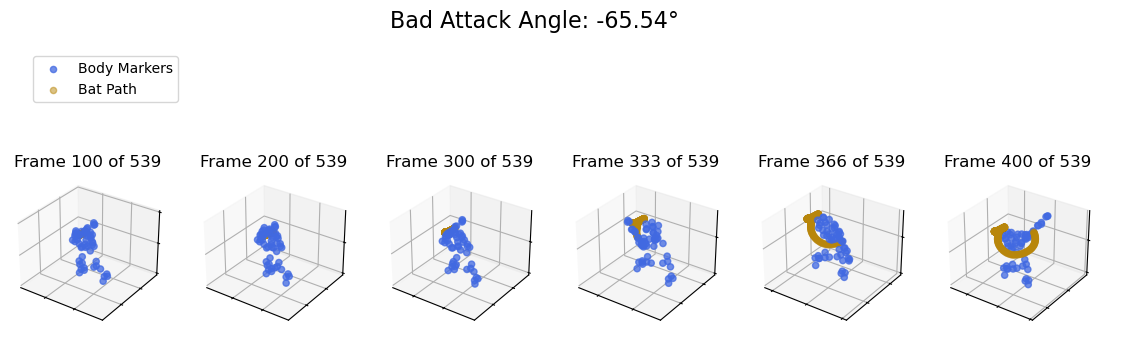

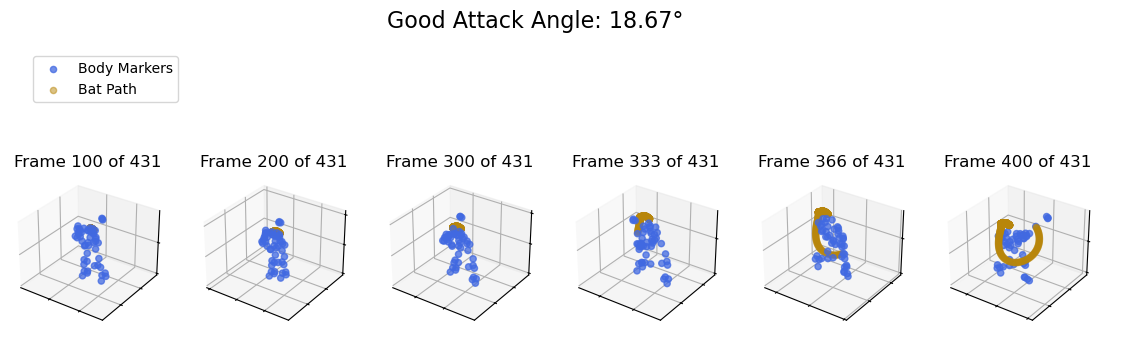

In [5]:
def calculate_attack_angle(c, marker_index, frame_start, frame_end):
    points = c["data"]["points"] 

    bat_positions = points[:3, marker_index, frame_start:frame_end]  # (x, y, z, frames)
    
    if bat_positions.shape[1] < 2:
        return np.nan  
    
    delta_z = np.diff(bat_positions[2, :])  # Vertical movement (z-axis)
    delta_x = np.diff(bat_positions[0, :])  # Horizontal movement (x-axis)
    
    attack_angles = np.arctan2(delta_z, delta_x)
    attack_angle_degrees = np.degrees(np.mean(attack_angles))  
    
    return attack_angle_degrees

def visualize_attack_angle(c, marker_index, select_frames, approx_swing_init_frame, title):
    points = c["data"]["points"]
    num_frames = points.shape[2]  

    select_frames = [frame for frame in select_frames if frame < num_frames]
    
    fig = plt.figure(figsize=(14, 5))
    
    for i, frame in enumerate(select_frames):
        ax = fig.add_subplot(1, 6, i+1, projection='3d')
        x = points[0, :, frame]
        y = points[1, :, frame]
        z = points[2, :, frame]
        
        marker_points = ax.scatter(x, y, z, alpha=0.75, color="royalblue")
        
        barrel_points = ax.scatter(
            xs=points[0, marker_index, approx_swing_init_frame:frame],
            ys=points[1, marker_index, approx_swing_init_frame:frame],
            zs=points[2, marker_index, approx_swing_init_frame:frame],
            color="darkgoldenrod",
            alpha=0.5
        )
        ax.set_title(f"Frame {frame} of {num_frames}")
        ax.axis('equal')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.view_init(elev=30, azim=-55, roll=0)

    fig.suptitle(title, fontsize=16)
    fig.legend((marker_points, barrel_points), ("Body Markers", "Bat Path"), bbox_to_anchor=(0, 0.5, 0.25, 0.4))
    plt.show()

def analyze_attack_angles(c3d_file_paths, exit_velocities):
    attack_angles = []
    marker5_index = None
    
    for file_path, velo in zip(c3d_file_paths, exit_velocities):
        c = ezc3d.c3d(file_path)
        labels = c["parameters"]["POINT"]["LABELS"]["value"]
        
        if marker5_index is None:
            marker5_index = [i for i, label in enumerate(labels) if label == "Marker5"][0]
        
        approx_swing_init_frame = 0  
        frame_end = c["header"]["points"]["last_frame"]  
        attack_angle = calculate_attack_angle(c, marker5_index, approx_swing_init_frame, frame_end)
        attack_angles.append(attack_angle)
    
    valid_data = [(angle, velo, path) for angle, velo, path in zip(attack_angles, exit_velocities, c3d_file_paths) if not np.isnan(angle)]
    attack_angles, exit_velocities, valid_file_paths = zip(*valid_data)
    
    correlation = np.corrcoef(attack_angles, exit_velocities)[0, 1]
    print(f"Correlation between Attack Angle and Exit Velocity: {correlation}")
    
    sorted_swings = sorted(zip(attack_angles, exit_velocities, valid_file_paths), key=lambda x: x[0])
    
    bad_attack_angle_swing = sorted_swings[0]
    c_bad = ezc3d.c3d(bad_attack_angle_swing[2])
    visualize_attack_angle(c_bad, marker5_index, [100, 200, 300, 333, 366, 400], 0, title=f"Bad Attack Angle: {bad_attack_angle_swing[0]:.2f}°")

    good_attack_angle_swing = sorted_swings[-1]
    c_good = ezc3d.c3d(good_attack_angle_swing[2])
    visualize_attack_angle(c_good, marker5_index, [100, 200, 300, 333, 366, 400], 0, title=f"Good Attack Angle: {good_attack_angle_swing[0]:.2f}°")


analyze_attack_angles(c3d_file_paths, exit_velocities)

### Results

The analysis yielded a correlation coefficient of **0.0047** between attack angle and exit velocity, indicating virtually no correlation between these two variables in our dataset. This low correlation suggests that, within the scope of this study, attack angle alone does not significantly influence exit velocity.

Several factors may have contributed to this lack of correlation:

1. **Complexity of Swing Mechanics**: The mechanics of a baseball swing are highly complex, involving multiple body segments, timing, force application, and coordination. Attack angle alone may not captureall of these ected elements, which could dilute its impact on exit velocity. Other metrics, such as rotational velocity, bat speed, or body segment positioning, might play a more influential role.

2. **Data Variability**: Differences in player skill levels, bat speed, pitch types, and swing strategies introduce variability that may mask any underlying relationship. Without controlling for these variables, it becomes challenging to isolate the specific effect of attack angle on exit ved sample.

#### Future Directions

To address these limitationournd improve the model's ability to predict exit velocity, future research could focus on the following:

- **Incorporate Additional Swing Metrics**: Adding variables such as bat speed, hand path, hip rotation speed, and pitch location could provide a more complete picture of the factors influencing exit velocity.
  
- **Segmented Analysis**: Instead of examining all swings as a single dataset, future studies could segment the data based on swing type, player skill level, or pitch characteristics, which may reveal patterns specific to Since the dataset we used from Driveline Baseball was very extensive and had spaciotemporal data for many different parts of the swing, this analysis would be possible.die robust conclusions.

In summary, while our analysis did not reveal a correlation between attack angle and exit velocity, future studies that incorporate a broader set of swing metrics and a larger dataset may be better equipped to uncover using spaciotemporal data.potential relationships.
